In [3]:
from math import sin, pi
import numpy as np
def pendulum_dynamics(q):
    l = 1.0
    g = 9.81
    
    theta = q[0]
    theta_dot = q[1]
    
    theta_ddot = -(g/l)*sin(theta)
    
    return np.array([theta_dot, theta_ddot])

In [4]:
def forward_euler(dyn_fun, q0, Tf, dt):
    t = np.arange(0, Tf, dt)
    num_points = len(t)
    num_states = len(q0)
    q_hist = np.zeros((num_states, num_points))
    q_hist[:,0] = q0
    
    for k in range(num_points-1):
        q_hist[:,k+1] = q_hist[:,k] + dt*dyn_fun(q_hist[:,k])
        
    return q_hist, t

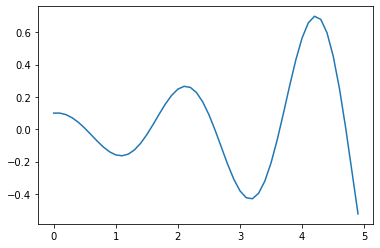

In [5]:
import matplotlib.pyplot as plt
q0 = np.array([0.1, 0.])
q_hist, t_hist = forward_euler(pendulum_dynamics,
                               q0,
                               Tf=5,
                               dt=0.1)
plt.plot(t_hist, q_hist[0,:], "-o")

In [12]:
def fd_pendulum_rk4(qk, dt):
    f1 = pendulum_dynamics(qk)
    f2 = pendulum_dynamics(qk + 0.5*dt*f1)
    f3 = pendulum_dynamics(qk + 0.5*dt*f2)
    f4 = pendulum_dynamics(qk + dt*f3)
    return qk + (dt/6.0)*(f1 + 2*f2 + 2*f3 + f4)

def RK4(dyn_fun, q0, Tf, dt):
    t = np.arange(0, Tf, dt)
    num_points = len(t)
    num_states = len(q0)
    q_hist = np.zeros((num_states, num_points))
    q_hist[:,0] = q0
    
    for k in range(num_points-1):
        q_hist[:,k+1] = fd_pendulum_rk4(q_hist[:,k], dt)

    return q_hist,t

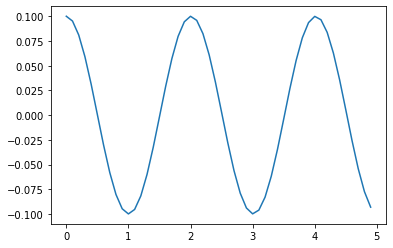

In [16]:
q0 = np.array([0.1, 0.])
q_hist, t_hist = RK4(pendulum_dynamics,
                               q0,
                               Tf=5,
                               dt=0.1)
plt.plot(t_hist, q_hist[0,:], "-o")

In [6]:
def backward_euler(dyn_fun, q0, Tf, dt):
    t = np.arange(0, Tf, dt)
    num_points = len(t)
    num_states = len(q0)
    q_hist = np.zeros((num_states, num_points))
    q_hist[:,0] = q0
    
    for k in range(num_points-1):
        e = 1
        q_hist[:,k+1] = q_hist[:,k]
        # fixed point iteration
        while e > 1e-8:
            q_ = q_hist[:,k] + dt*dyn_fun(q_hist[:,k+1])
            e = np.linalg.norm(q_ - q_hist[:,k+1])
            q_hist[:,k+1] = q_

    return q_hist,t

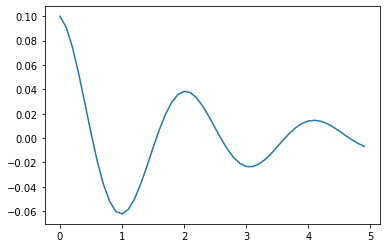

In [11]:
q0 = np.array([0.1, 0.])
q_hist, t_hist = backward_euler(pendulum_dynamics,
                               q0,
                               Tf=5,
                               dt=0.1)
plt.plot(t_hist, q_hist[0,:], '-o')